# EDA a partir de la API de MELI
### Parte II: algoritmo predictivo
<a id="top"></a>
Autor: Mathiews Flores Zavala

<p> En esta notebook, voy a explorar los resultados de las publicaciones de MELI meduante su API de acceso público, que se vio en la Parte I (ver en el<a href = 'https://github.com/Mattzvl/EDA_API_ML'> EDA_API_MELI </a> para mas detalles).</p>
<p><strong>Objetivo:</strong> Implementar un algoritmo predictivo para poder predecir las unidades vendidas <i>sold_quantity</i></p>

## Tabla de Contenidos
1. <a href="#1">Data Wrangling</a>
* 1.1 <a href="#1.1">Importando librerías y datos</a>
* 1.2 <a href="#1.2">Exploramos el Data Set </a>
* 1.3 <a href="#1.3">Tratamiento del data set: columnas, duplicados y valores NaN</a>
* 1.4 <a href="#1.4">Outliers</a>
* 1.5 <a href="#1.5">Visualización</a>
* 1.6 <a href="#1.6">Feature Engineering</a>


* 1.4 <a href="#1.4">Tratamiento del data set de test puro</a>
* 1.5 <a href="#1.5">Funcion de Limpieza</a>
* 1.6 <a href="#1.6">Tokenizando para Analisis de Palabras </a>
2. <a href="#2">Identificado data extra (*Get the Data*)</a>
* 2.1 <a href='#2.1'>Extraccion de datos extra</a>

3. <a href="#3">Conclusion de Parte I</a>
* 3.1 <a href='#3.1'>Preparacion del data set final</a>
* 3.2 <a href='#3.2'>Comentarios finales</a>


---
<a href="#top">Back to Index</a>
<a id="1"></a>
### 1) Data Wrangling
<a id="1.1"></a>
#### 1.1) Importando librerias y datos

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from time import time, sleep
import re

#from bs4 import BeautifulSoup

Consulto la API de Mercado Libre publica mediante búsquedas. En esta instacia me focalizaré en recopilar datos para componer una muestra de la población de publicaciones disponibles de la API de MELI

In [2]:
data = pd.read_csv('./data/data_part1.csv')
data.head()

,id,site_id,title,price,prices,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,...,neutral,claims,delayed_handling_time,sales,cancellations,free_shipping,mode,tags.2,logistic_type,store_pick_up
0,MLA898264823,MLA,Smart Tv Tcl 50p8m Led 4k 50,54999.0,"{'id': 'MLA898264823', 'prices': [{'id': '16',...",NaN,ARS,1,121,buy_it_now,...,0.02,"{'rate': 0.0148, 'value': 185, 'period': '60 d...","{'rate': 0.0152, 'value': 181, 'period': '60 d...","{'period': '60 days', 'completed': 11792}","{'rate': 0.003, 'value': 38, 'period': '60 days'}",True,me2,"['mandatory_free_shipping', 'self_service_in']",cross_docking,False
1,MLA905996538,MLA,Smart Tv Hyundai 50 4k Uhd Google Android,49999.0,"{'id': 'MLA905996538', 'prices': [{'id': '139'...",NaN,ARS,1,250,buy_it_now,...,0.01,"{'rate': 0.0084, 'value': 1109, 'period': '60 ...","{'rate': 0, 'value': 0, 'period': '60 days'}","{'period': '60 days', 'completed': 125242}","{'rate': 0, 'value': 0, 'period': '60 days'}",True,me2,"['fulfillment', 'mandatory_free_shipping']",fulfillment,False
2,MLA898844422,MLA,Smart Tv Samsung Series 7 Un50tu7000gczb Led 4...,75999.0,"{'id': 'MLA898844422', 'prices': [{'id': '152'...",NaN,ARS,273,7388,buy_it_now,...,0.01,"{'rate': 0.0084, 'value': 1109, 'period': '60 ...","{'rate': 0, 'value': 0, 'period': '60 days'}","{'period': '60 days', 'completed': 125242}","{'rate': 0, 'value': 0, 'period': '60 days'}",True,me2,"['fulfillment', 'mandatory_free_shipping']",fulfillment,False
3,MLA933497704,MLA,Amazon Fire Tv Stick 4k De Voz 4k 8gb Negro...,10888.0,"{'id': 'MLA933497704', 'prices': [{'id': '1', ...",NaN,ARS,3,2,buy_it_now,...,0.01,"{'rate': 0, 'value': 1, 'period': '60 days'}","{'rate': 0, 'value': 0, 'period': '60 days'}","{'period': '60 days', 'completed': 2364}","{'rate': 0, 'value': 0, 'period': '60 days'}",True,me2,"['self_service_in', 'mandatory_free_shipping']",cross_docking,False
4,MLA926081002,MLA,Smart Tv Bgh 50 Uhd Android,66999.0,"{'id': 'MLA926081002', 'prices': [{'id': '37',...",NaN,ARS,250,250,buy_it_now,...,0.01,"{'rate': 0.0084, 'value': 1109, 'period': '60 ...","{'rate': 0, 'value': 0, 'period': '60 days'}","{'period': '60 days', 'completed': 125242}","{'rate': 0, 'value': 0, 'period': '60 days'}",True,me2,"['fulfillment', 'mandatory_free_shipping']",fulfillment,False


In [5]:
data.shape

(4160, 63)

La busqueda mediante la API de MELI se obtuvo un data set con 4160 registros focalizado principalmente elementos de eletronica como lo son televisores, telefonos, notebooks, tablets.

<a id="1.2"></a>
#### 1.2) Explorando el data set

In [6]:
# explioramos el data set de la parte 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4160 non-null   object 
 1   site_id                4160 non-null   object 
 2   title                  4160 non-null   object 
 3   price                  4160 non-null   float64
 4   prices                 4160 non-null   object 
 5   sale_price             0 non-null      float64
 6   currency_id            4160 non-null   object 
 7   available_quantity     4160 non-null   int64  
 8   sold_quantity          4160 non-null   int64  
 9   buying_mode            4160 non-null   object 
 10  listing_type_id        4160 non-null   object 
 11  stop_time              4160 non-null   object 
 12  condition              4160 non-null   object 
 13  permalink              4160 non-null   object 
 14  thumbnail              4160 non-null   object 
 15  thum

In [7]:
# veamos los valores númericos para conocer su comportamiento
data.describe()

,price,sale_price,available_quantity,sold_quantity,original_price,official_store_id,order_backend,id.1,total,canceled,completed,negative,positive,neutral
count,4.160000e+03,0.0,4160.000000,4160.000000,709.000000,621.000000,4160.000000,4.160000e+03,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000
mean,7.448659e+04,NaN,156.363702,50.757212,75526.043554,1090.275362,25.497356,2.081767e+08,51226.624038,2776.597356,48450.026683,0.027495,0.947060,0.023281
std,3.707253e+05,NaN,1515.758183,343.723400,64331.915747,827.029270,14.431171,1.686220e+08,110814.910854,5546.391381,105340.620247,0.042096,0.098846,0.079299
min,3.300000e+01,NaN,1.000000,0.000000,1600.000000,47.000000,1.000000,1.048590e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000e+04,NaN,1.000000,1.000000,20899.000000,229.000000,13.000000,8.252185e+07,3235.000000,180.000000,3081.000000,0.010000,0.940000,0.010000
50%,4.995850e+04,NaN,1.000000,5.000000,59999.000000,1205.000000,25.500000,1.727533e+08,13374.000000,958.000000,12740.000000,0.020000,0.960000,0.020000
75%,9.310338e+04,NaN,3.000000,25.000000,109999.000000,1938.000000,38.000000,2.848246e+08,41854.000000,2303.000000,39757.000000,0.030000,0.980000,0.020000
max,2.335000e+07,NaN,50000.000000,10459.000000,395999.000000,2588.000000,50.000000,8.006795e+08,613410.000000,29023.000000,585075.000000,1.000000,1.000000,1.000000


En esta priemra instancia podemos observar que cirtos valores como *id.1, official_store_id, order_backend* no aportaran peso al modelo.
Por otro lado la columna *sale_price* se encuentra vacia.

 <a id="1.3"></a>
#### 1.3) Tratamiento del data set: columnas, duplicados y valores NaN
En esta instancia se tratarán las columnas, valores duplicados y nulos.
Además, determinar que registros se conservarán.

In [9]:
# eliminamos las columnas que consideramos no nos aportarán al modelo
data_clean = data.drop(['id.1', 'official_store_id', 'order_backend'],axis =1)

In [22]:
# conozco las columnas que posee y para referencia
columnas_ref =data_clean.columns

# exploro cuales son aquellas columnas que contienen id en su nombre y que pueden ser simplemente primaries o foreign keys
indices_col_ref = [pos for pos, element in enumerate(columnas_ref) if 'id' in element]
columnas_ref[indices_col_ref]

Index(['id', 'site_id', 'currency_id', 'listing_type_id', 'thumbnail_id',
       'category_id', 'domain_id', 'catalog_product_id', 'use_thumbnail_id',
       'state_id', 'city_id', 'level_id'],
      dtype='object')

In [25]:
# veamos el data set que contiene solamente columnas con la palabra id
data_clean[columnas_ref[indices_col_ref]]

,id,site_id,currency_id,listing_type_id,thumbnail_id,category_id,domain_id,catalog_product_id,use_thumbnail_id,state_id,city_id,level_id
0,MLA898264823,MLA,ARS,gold_special,849404-MLA45797322642_052021,MLA1002,MLA-TELEVISIONS,MLA15186500,True,AR-C,NaN,5_green
1,MLA905996538,MLA,ARS,gold_special,836204-MLA44728420590_012021,MLA1002,MLA-TELEVISIONS,MLA17849007,True,AR-B,NaN,5_green
2,MLA898844422,MLA,ARS,gold_pro,878604-MLA44160072739_112020,MLA1002,MLA-TELEVISIONS,MLA16233171,True,AR-B,NaN,5_green
3,MLA933497704,MLA,ARS,gold_special,700522-MLA46539887496_062021,MLA352001,MLA-STREAMING_MEDIA_DEVICES,MLA14141341,True,AR-C,NaN,5_green
4,MLA926081002,MLA,ARS,gold_pro,893006-MLA46430431526_062021,MLA1002,MLA-TELEVISIONS,NaN,True,AR-B,NaN,5_green
...,...,...,...,...,...,...,...,...,...,...,...,...
4155,MLA871820328,MLA,ARS,gold_pro,718399-MLA41642098919_052020,MLA1652,MLA-NOTEBOOKS,NaN,False,AR-C,TUxBQlZJTDQyMjBa,5_green
4156,MLA900496858,MLA,ARS,gold_pro,871478-MLA42424954747_062020,MLA1652,MLA-NOTEBOOKS,NaN,False,AR-C,TUxBQkJFTDcyNTJa,5_green
4157,MLA895870357,MLA,ARS,gold_pro,612018-MLA46887309472_072021,MLA1652,MLA-NOTEBOOKS,MLA17328361,False,AR-B,NaN,5_green
4158,MLA866181995,MLA,ARS,gold_special,698116-MLA46101176637_052021,MLA1652,MLA-NOTEBOOKS,MLA16053932,False,AR-C,TUxBQlNBTjgzMjRa,5_green


In [36]:
def cant_valores_unicos(df):
    '''Cuenta la cantidad de valores unicos que existen cada columna de un dataset y devuelve un diccionario'''
    columnas = df.columns
    rta = {}
    for col in columnas:
        rta[col] = len(df[col].value_counts())
    return rta

In [37]:
cant_valores_unicos( data_clean[columnas_ref[indices_col_ref]] )

{'id': 4152,
 'site_id': 1,
 'currency_id': 1,
 'listing_type_id': 2,
 'thumbnail_id': 3437,
 'category_id': 14,
 'domain_id': 11,
 'catalog_product_id': 1221,
 'use_thumbnail_id': 2,
 'state_id': 19,
 'city_id': 98,
 'level_id': 4}

Como se puede observar, solo hay valores únicos para *site_id, currency_id* por lo tanto dropeare estos ya que no aportaran sustancialmente algo al modelo. Esto tiene sentido ya que los valores de las busquedas a la API se realizaron mediante el sitio MLA, por consiguiente la moneda predominante debería ser PESOS ARS.

In [41]:
data_clean = data_clean.drop(['site_id', 'currency_id'],axis =1)

Ocurre algo similar con *state_id, city_id* donde al ya tener *state_name, y city_name* estas resultan redundantes para el análisis. Así que tambien serán dropeadas.

In [43]:
data_clean = data_clean.drop(['state_id', 'city_id'],axis =1)

Tratamiento de valores duplicados, existen valores duplicados? es decir que contengan exactamente la misma data en sus registros.

In [47]:
# tratamiento de duplicados
print('Hay {} registros duplicados'.format(data_clean.duplicated().sum() ))

# eliminamos los registros duplicados
data_clean.drop_duplicates(inplace = True, keep='last')

print('\nQuedan registros duplicados?', data.duplicated().any() )

Hay 8 registros duplicados

Quedan registros duplicados? False


Respecto de datos *id* de las publicaciones que actuarian como una llave para los registros. En este caso, la cantidad de registros únicos coincidecon la cantidad de registros duplicados.
Por otro lado, respecto de las miñiaturas *thumbnail_id, use_thumbnail_id* no serán incorporadas al modelo.

In [49]:
data_clean = data_clean.drop(['thumbnail_id', 'use_thumbnail_id'],axis =1)

La columna *category_id* esta estreñamente relacionada con *domain_id* por lo tanto mantendremos solamente *domain_id*, que se utilizó en una instancia anterior para poder analizar los datos por categorias.

In [51]:
data_clean = data_clean.drop(['category_id'],axis =1)

In [52]:
# volvamos a ver cuantas son las que columnas que conservamos
columnas_ref2 =data_clean.columns
indices_col_ref2 = [pos for pos, element in enumerate(columnas_ref2) if 'id' in element]
columnas_ref2[indices_col_ref2]

Index(['id', 'listing_type_id', 'domain_id', 'catalog_product_id', 'level_id'], dtype='object')

In [54]:
# level_id parece indicar, siendo redundante, el nivel donde verde es muy bueno y naranja no tan bueno, esto relacionado
# con la confiabilidad/reputacion del vendedor que se indica en el portal de mercado libre usando esta escala.
data_clean['level_id'].value_counts()

5_green          3996
3_yellow           48
2_orange           13
4_light_green       8
Name: level_id, dtype: int64

In [56]:
# veamos que pasa con listing_type, el tipo de cotizacion se puede ver que hay dos tipos de categoria
data_clean['listing_type_id'].value_counts()

gold_special    2823
gold_pro        1329
Name: listing_type_id, dtype: int64

Para esta instancia es claro denotar que hay información que puede ser redundante y a su vez equivalente a otras, la descripción de una publicación se conrresponde con el id, pero ofrece data que puede ser más sustancial.

Por otro lado, *catalog_product_id* es el producto que se publica, que puede ser común para varias publicaciones (estan correlacionadas)

In [75]:
data_clean = data_clean.drop(['id'],axis =1)

Concentremonos en los **valores nulos** que tenemos, como se vio anteriormente *sale_price* es la única columna con todos sus registros nulos.

In [76]:
data_clean = data_clean.drop(['sale_price'],axis =1)

<a id="1.4"></a>
#### 1.4) Eliminación de Outliers

En esta instancia se eliminaran ciertos outliers que pueden hacer ruido en el modelo, principalmente aquellos vistos en la Parte I (ver en el<a href = 'https://github.com/Mattzvl/EDA_API_ML'> EDA_API_MELI </a> para mas detalles).</p> En este caso se empezará por el precio

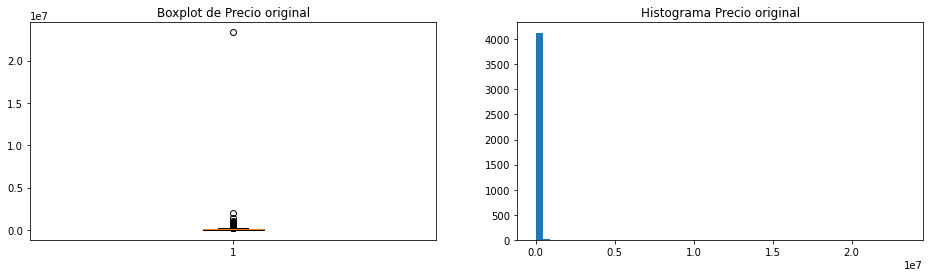

In [136]:
plt.figure(figsize = (16, 4))
ax = plt.subplot(1,2,1)
plt.boxplot(data=data_clean, x='original_price')
plt.title('Boxplot de Precio original');

ax = plt.subplot(1,2,2)
plt.hist(data=data_clean, x='original_price', bins=50)
plt.title('Histograma Precio original');

La forma del histograma hace recordar a los vistos en la parte 1, en particular para Tables y Televisores

In [132]:
# quitamos las  filas con distancias mayores a 1.5 + IQR
Q1_d, Q3_d = np.percentile(data_clean['original_price'], [25, 75])
IQR_d = Q3_d-Q1_d
lower_bound_d = Q1_d - (1.5 * IQR_d)
upper_bound_d = Q3_d + (1.5 * IQR_d)
# outlier_index = np.where((x < lower_bound) | (x > upper_bound))

# nos quedamos con las aquellos precios originales menores al quartil 3
data_clean2 = data_clean.loc[data_clean['original_price'] < upper_bound_d]

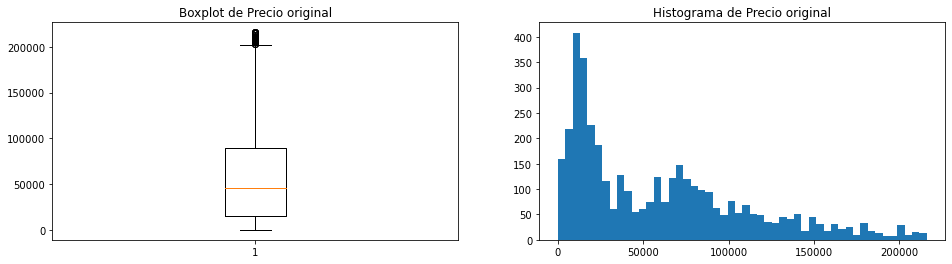

In [138]:
# veamos como resulto leugo de la eliminación de outlies
plt.figure(figsize = (16, 4))
ax = plt.subplot(1,2,1)
plt.boxplot(data=data_clean2, x='original_price')
plt.title('Boxplot de Precio original');

ax = plt.subplot(1,2,2)
plt.hist(data=data_clean2, x='original_price', bins=50)
plt.title('Histograma de Precio original');

Luego de la eliminación de Outliers se puede apreciar una distribución normal segada por la derecha, si bien siguen quedando algunos valores que estan algo por encima fuera del boxplot, los conservaremos apra el modelo.

<a id="1.6"></a>
#### 1.6) Feature Engineering

Respecto de los valores **nulos** de la columna *original_price*, aquellos registros con valores *nulls* corresponden a valores donde se aplica un descuento. Al ser *original_price* correlativa a *price*, voy a conservar price, sin embargo se generará un nuevo campo que represente el % de descuento.

In [119]:
data_clean2[['price','original_price']].sample(7)

,price,original_price
2558,16890.0,16890.0
2395,17999.0,25999.0
3938,159595.0,159595.0
730,72929.0,72929.0
937,14000.0,14000.0
1360,37524.0,37524.0
1180,10490.0,10490.0


In [118]:
# completo los datos nulo de original_price con los valores de price
data_clean2['original_price'].fillna(data_clean2['price'], inplace = True)
#y verifico por si acaso
data_clean2['original_price'].isnull().sum()

0

In [121]:
# chequeo que no haya ningun valor de precio con valores = 0, es decir, Free!
data_clean2[data_clean2['original_price'] == 0]

,title,price,prices,available_quantity,sold_quantity,buying_mode,listing_type_id,stop_time,condition,permalink,...,neutral,claims,delayed_handling_time,sales,cancellations,free_shipping,mode,tags.2,logistic_type,store_pick_up


In [122]:
# creo una nueva columna donde indico el valor del descuento que se aplica en la publciacion
data_clean2['discount'] = 1 - data_clean2['price']/data_clean2['original_price']

In [125]:
# para visualizar mejor 
data_clean2.to_excel('./data/data_clean2.xlsx', index= False)

Datos unicos? para no tener un data set desbalanceado voy a eliminar aquellos casos donde solo haya un registro. Ya que hacer upper sampling implicaría simplemente en duplicar los registros únicos para las categorías de *domain_id*
donde solo tengo un valor.

In [79]:
# tipos de dominios, para identificar si la busqueda me devolvio efectivamente los cambos de las busquedas
data_clean2.domain_id.value_counts()

MLA-NOTEBOOKS                                 1048
MLA-TABLETS                                   1040
MLA-CELLPHONES                                1025
MLA-TELEVISIONS                                826
MLA-STREAMING_MEDIA_DEVICES                    110
MLA-TV_REMOTE_CONTROLS                          48
MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS         43
MLA-TV_AND_MONITOR_MOUNTS                        9
MLA-TV_RECEIVERS_AND_DECODERS                    1
MLA-TV_REMOTE_CONTROL_COVERS                     1
MLA-ELECTRONIC_ACCESSORIES_AND_SPARE_PARTS       1
Name: domain_id, dtype: int64

<a id="1.5"></a>
#### 1.5) Visualizacion de datos

In [141]:
(data_clean2.groupby('domain_id')['original_price'].agg(['mean','median','std','max','min']).round(2)).sort_values(by = 'mean', ascending=False)

,mean,median,std,max,min
domain_id,,,,,
MLA-NOTEBOOKS,112929.78,109000.00,43022.86,216000.0,1000.00
MLA-TELEVISIONS,82403.79,75999.00,38652.75,215000.0,33.00
MLA-CELLPHONES,34057.05,23999.00,32174.29,208999.0,50.00
MLA-TABLETS,28441.38,16129.00,33415.40,214999.0,65.00
MLA-STREAMING_MEDIA_DEVICES,11134.63,10998.50,4876.99,49400.0,5490.00
MLA-TV_RECEIVERS_AND_DECODERS,9999.00,9999.00,NaN,9999.0,9999.00
MLA-ELECTRONIC_ACCESSORIES_AND_SPARE_PARTS,6999.00,6999.00,NaN,6999.0,6999.00
MLA-TV_AND_MONITOR_MOUNTS,2374.61,499.99,3402.24,9380.0,299.99
MLA-TV_REMOTE_CONTROL_COVERS,1600.00,1600.00,NaN,1600.0,1600.00


Las notebooks representan aquellos productos que tienen el mayor precio promedio (independientemente de la gama del articulo)
En tanto que las tablets tienen el menor precio medio.

Los valores máx quedaron mucho más coherentes, aunque hay casos donde el min de television, telefonos y tablet que son casi 2500 veces menores a la media, del orden de 1e-4.

Aquellos que tienen std = NaN, son aquellos elementos que son unicos, ya que temino dividinedo por 0 (n-1).
Estos son productos que se colaron el la busqueda de television, donde los resultados entregados no fueron tan precisos como con tablets, notebooks y celulares.

domain_id = ['MLA-ELECTRONIC_ACCESSORIES_AND_SPARE_PARTS', 'MLA-TV_RECEIVERS_AND_DECODERS', 'MLA-TV_REMOTE_CONTROL_COVERS']

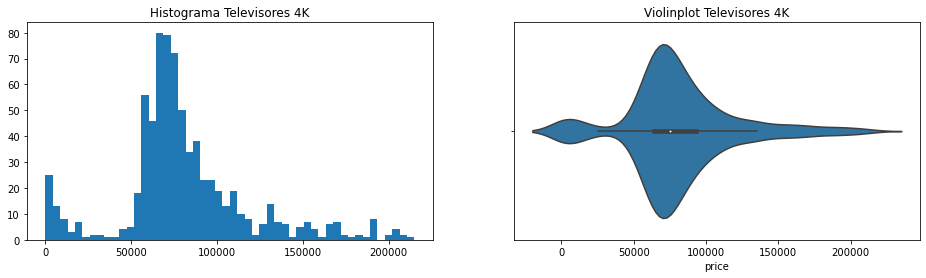

In [142]:
plt.figure(figsize = (16, 4))

ax = plt.subplot(1,2,1)
data_2plot = data_clean2[data_clean2['domain_id'] == 'MLA-TELEVISIONS']
plt.hist(data=data_2plot, x='price', bins=50)
plt.title('Histograma Televisores 4K')

ax = plt.subplot(1,2,2)
sns.violinplot(data=data_2plot, x='price', bins=10)
plt.title('Violinplot Televisores 4K')
plt.show()

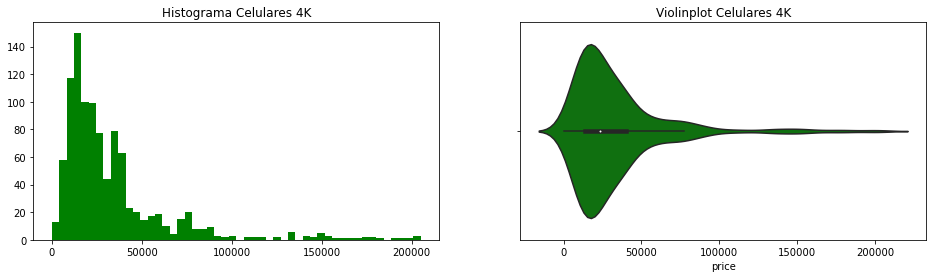

In [143]:
plt.figure(figsize = (16, 4))
ax = plt.subplot(1,2,1)
data_2plot = data_clean2[data_clean2['domain_id'] == 'MLA-CELLPHONES']
plt.hist(data=data_2plot, x='price', bins=50, color= 'green')
plt.title('Histograma Celulares 4K')

ax = plt.subplot(1,2,2)
sns.violinplot(data=data_2plot, x='price', bins=10, color= 'green')
plt.title('Violinplot Celulares 4K')
plt.show()

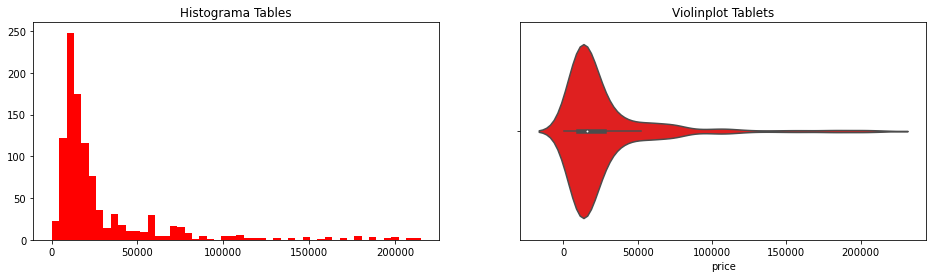

In [144]:
plt.figure(figsize = (16, 4))
ax = plt.subplot(1,2,1)
data_2plot = data_clean2[data_clean2['domain_id'] == 'MLA-TABLETS']
plt.hist(data=data_2plot, x='price', bins=50, color= 'red')
plt.title('Histograma Tables')

ax = plt.subplot(1,2,2)
sns.violinplot(data=data_2plot, x='price', bins=50, color= 'red')
plt.title('Violinplot Tablets')
plt.show()

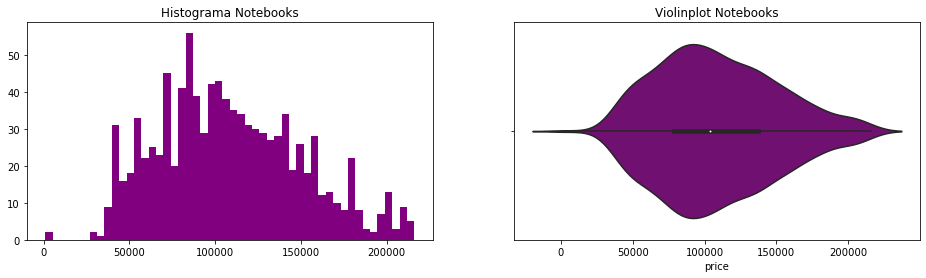

In [146]:
plt.figure(figsize = (16, 4))
ax = plt.subplot(1,2,1)
data_2plot = data_clean2[data_clean2['domain_id'] == 'MLA-NOTEBOOKS']
plt.hist(data=data_2plot, x='price', bins=50, color= 'purple')
plt.title('Histograma Notebooks')

ax = plt.subplot(1,2,2)
sns.violinplot(data=data_2plot, x='price', bins=50, color= 'purple')
plt.title('Violinplot Notebooks')
plt.show()

Los histogramas parecen distribuciones normales, la mayoria segadas hacia la izquierda (precios más bajos) al menos en televisores, celulares y tablets.

Se observa que hay ciertos datos anómalos al menos en la zona televisores que forman otro pico en uno de los extremos de la distribución, esto podría deberse a productos que tengan relación estrecha con televiosres, como controles, accesorios, sin embargo recibieron se etiquetaron con el *domain_id* que le corresponde a los televisores.

#### Estudio de correlaciones

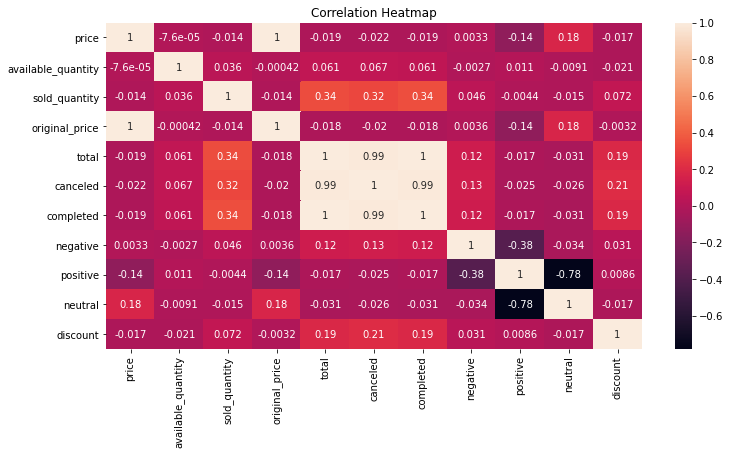

In [150]:
# graficamos un heatmap para exploras la relacion entre variables
plt.figure(figsize=(12,6))
# para no incorporar solamente aquellas variables numericas, ya que de lo contrario me tomaria los buleanos 
num_cols = [x for x in data_clean2.select_dtypes(include=['number']).columns]
sns.heatmap(data_clean[num_cols].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

De lo observado en el heat map, se puede ver que *sold_quantity* tiene relación poca correlación varios campos, la relación negativa de unidades vendidas con el precio, nos indicaría a priori que a mayor precio menos unidades vendidas.

Los aportes de cantidad de pedidos *total, canceled, completes* tienen practicamente el mismo aporte. Luego el rate *negative, positive, neutral* tienen un aporte cercano al cero. Lo mismo con *aviable_quantity*.

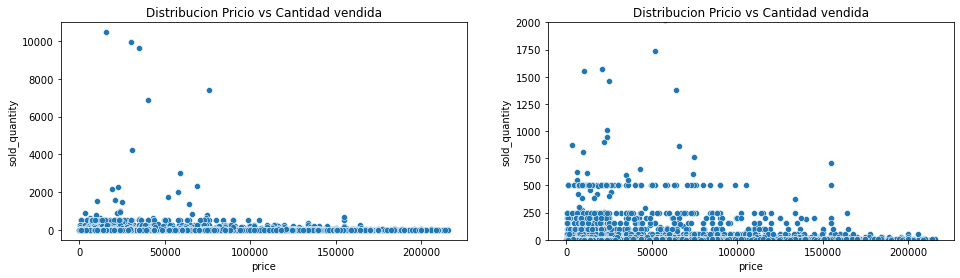

In [158]:
#Correlación entre cantidades vendidas y el precio
plt.figure(figsize = (16, 4))
data2plot1 = data_clean2.loc[:,['sold_quantity','price',]].copy()
ax = plt.subplot(1,2,1)
sns.scatterplot(data= data2plot1 ,x='price',y='sold_quantity')
plt.title('Distribucion Pricio vs Cantidad vendida');

ax = plt.subplot(1,2,2)
sns.scatterplot(data= data2plot1 ,x='price',y='sold_quantity')
plt.ylim(0, 2000)
plt.title('Distribucion Pricio vs Cantidad vendida');

<a href="#top">Back to Index</a>
<a id="2"></a>
### 2) Identificado data extra (*Get the Data*)
<a id="2.1"></a>
#### 2.1) Extraccion de datos extra

El data set obtenido de los *results* de la consulta existen ciertos campos referidos tanto al proveedor, su historia y rating, entre otros, que son diccionarios contenidos en una columna del dataframe. Se identificarán las mismas, y mediante una función “expandiremos” dicho data set. Esto en medida que los valores sean significativos al modelo de negocio, en función de mi propio entendimiento.

<a href="#top">Back to Index</a>
<a id="3"></a>
### 3) Conclusion de Parte I
<a id="3.1"></a>
#### 3.1) Preparacion del data set final

Preparo el data set final que empleare en la PARTE II instancia de modelado, donde se seguira tratando el data set final obtenido en esta instancia pero enfocando para su uso en un algoritmo, por lo tanto pasara por las intancias de limpieza, feature seleccition y feature engineering.

In [520]:
# concatenamos los datasets obtenidos hasta el momento
df_part1 = pd.concat([df, df2, d3], axis = 1)
df_part1.shape

(4160, 63)

In [521]:
df_part1.to_excel('./data/data_part1.xlsx', index= False)
df_part1.to_csv('./data/data_part1.csv', index= False)

<a id="3.2"></a>
#### 3.2) Comentarios finales

Como se pudo observar en el analisis exploratorio realizado, se pudo ver los siguiente:
* Las busquedas pueden ser mas o menos precisas en funcion del tag de la busqueda, por ejemplo *tv 4k* trajo aparejada una mayor cantidad de categorias (distintos *domain_id*), no paso asi con las demas
* El descuento promedio en las publicaciones es del 15%, y hay un 17% de productos de descuentos en la parte electronica (de esta muestra).
* Las notebooks son el producto con mayor cantidad de productos en descuento, sin embargo las tablets son las que ofrecen mayor descuento promedio en su precio de publicado


Para más detalles visitar el repositorio <a href = 'https://github.com/Mattzvl/EDA_API_ML'>EDA_API_MELI</a> que contiene este archivo y la parte II

In [473]:
#pip freeze > requirements.txt